# EDA 

In [1]:
#Importing all necessary libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np 
warnings.filterwarnings("ignore")

In [2]:
#Reading files
data_index = pd.read_excel('index.xlsx')
data_largecap = pd.read_excel('largecap.xlsx')
data_smallcap = pd.read_excel('smallcap.xlsx')
data_midcap = pd.read_excel('midcap.xlsx')

In [3]:
#Checking missing-values if any
data_index.isnull().sum()
#Filling the missing values
data_index.fillna(data_index.mean(), inplace=True)
data_index.isnull().sum()

#Companies in midcap
data_largecap.isnull().sum()
data_largecap.dropna(inplace=True)
data_largecap.isnull().sum()

#Companies in midcap
data_smallcap.isnull().sum()
data_smallcap.dropna(inplace=True)
data_smallcap.isnull().sum()

#Companies in midcap
data_midcap.isnull().sum()
data_midcap.dropna(inplace=True)
data_midcap.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Company Name          0
Industry              0
ISIN Code             0
Size                  0
dtype: int64

In [4]:
#merging all files for data analysis
data_largecap['cap'] = 'largecap'
data_smallcap['cap'] = 'smallcap'
data_midcap['cap'] = 'midcap' 

data_combined = pd.concat([data_largecap, data_smallcap, data_midcap]).reset_index(drop=True)

data_combined

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code,Size,cap
0,2019-01-01,ACC,EQ,1508.10,1516.90,1516.90,1475.00,1487.00,1488.80,1489.40,840791,1.252276e+14,23001,199769.0,0.2376,ACC Ltd.,CEMENT & CEMENT PRODUCTS,INE012A01025,Largecap,largecap
1,2019-01-02,ACC,EQ,1488.80,1487.85,1501.95,1477.55,1478.20,1483.95,1490.22,669181,9.972255e+13,28943,158385.0,0.2367,ACC Ltd.,CEMENT & CEMENT PRODUCTS,INE012A01025,Largecap,largecap
2,2019-01-03,ACC,EQ,1483.95,1483.95,1492.70,1445.40,1446.00,1452.25,1470.68,451970,6.647017e+13,16346,73760.0,0.1632,ACC Ltd.,CEMENT & CEMENT PRODUCTS,INE012A01025,Largecap,largecap
3,2019-01-04,ACC,EQ,1452.25,1458.00,1473.00,1437.55,1469.00,1469.10,1457.10,532734,7.762493e+13,17917,100804.0,0.1892,ACC Ltd.,CEMENT & CEMENT PRODUCTS,INE012A01025,Largecap,largecap
4,2019-01-07,ACC,EQ,1469.10,1482.00,1499.75,1471.80,1478.05,1477.95,1485.71,438357,6.512721e+13,13834,32390.0,0.0739,ACC Ltd.,CEMENT & CEMENT PRODUCTS,INE012A01025,Largecap,largecap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224280,2022-04-04,ZEEL,EQ,299.80,299.80,308.70,297.60,302.25,302.75,303.91,12108609,3.679891e+14,80804,2629231.0,0.2171,Zee Entertainment Enterprises Ltd.,MEDIA ENTERTAINMENT & PUBLICATION,INE256A01028,Midcap,midcap
224281,2022-04-05,ZEEL,EQ,302.75,304.50,307.00,298.40,299.50,300.15,301.94,9511869,2.872050e+14,60840,2306832.0,0.2425,Zee Entertainment Enterprises Ltd.,MEDIA ENTERTAINMENT & PUBLICATION,INE256A01028,Midcap,midcap
224282,2022-04-06,ZEEL,EQ,300.15,299.80,305.00,287.10,292.00,290.90,293.43,21387631,6.275745e+14,112481,7795585.0,0.3645,Zee Entertainment Enterprises Ltd.,MEDIA ENTERTAINMENT & PUBLICATION,INE256A01028,Midcap,midcap
224283,2022-04-07,ZEEL,EQ,290.90,285.00,296.90,283.20,285.20,284.75,289.18,67870863,1.962693e+15,244063,22919763.0,0.3377,Zee Entertainment Enterprises Ltd.,MEDIA ENTERTAINMENT & PUBLICATION,INE256A01028,Midcap,midcap


Text(0, 0.5, 'Price')

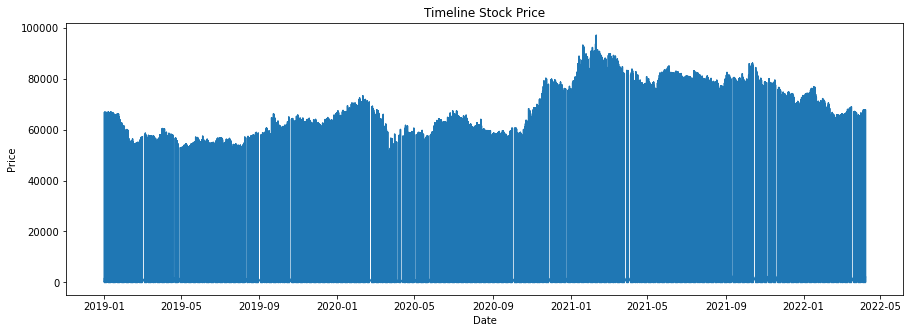

In [5]:
#Data time line
data_combined = data_combined.sort_values(['Date', 'cap'])
plt.figure(figsize=(15,5))
plt.plot(data_combined['Date'], data_combined['Close'])
plt.title('Timeline Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Frequency')

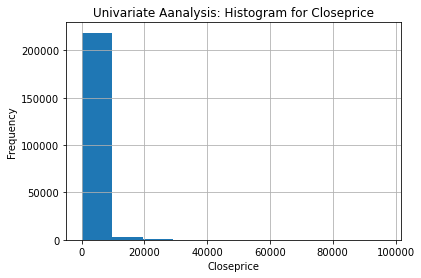

In [6]:
#Univariate(variable)analysis
data_combined['Close'].hist()
plt.title('Univariate Aanalysis: Histogram for Closeprice')
plt.xlabel('Closeprice')
plt.ylabel('Frequency')

Text(0, 0.5, 'Total count of stocks')

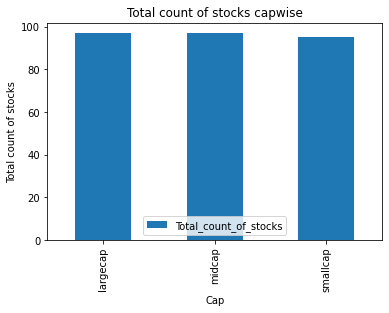

In [7]:
# Analysis on number of stocks in each cap
data_combined.groupby('cap').agg(Total_count_of_stocks=('Company Name','nunique')).plot(kind='bar')
plt.title('Total count of stocks capwise')
plt.xlabel('Cap')
plt.ylabel('Total count of stocks')

In [8]:
#Total number of stocks/companies in each cap count
display(data_combined.groupby('cap').agg(Total_count_of_stocks=('Company Name','nunique')))
data_combined.groupby('cap').agg(Total_count_of_stocks=('Company Name','nunique')).sum()

,Total_count_of_stocks
cap,
largecap,97
midcap,97
smallcap,95


Total_count_of_stocks    289
dtype: int64

Text(0, 0.5, 'Total volume of stocks')

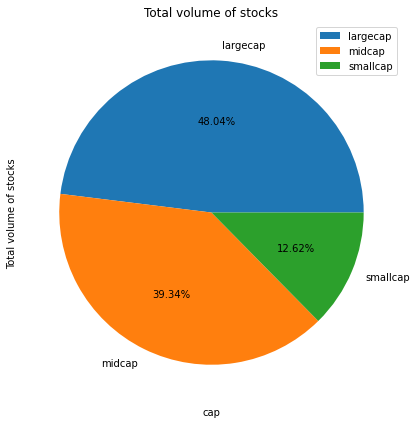

In [9]:
#Stock/Companies volume analysis
data_combined.groupby('cap').agg({'Volume':'sum'}).plot(kind='pie',subplots=True, autopct='%.2f%%',figsize=(7,7))
plt.title('Total volume of stocks')
plt.xlabel('cap')
plt.ylabel('Total volume of stocks')

cap
largecap    AxesSubplot(0.125,0.125;0.775x0.755)
midcap      AxesSubplot(0.125,0.125;0.775x0.755)
smallcap    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

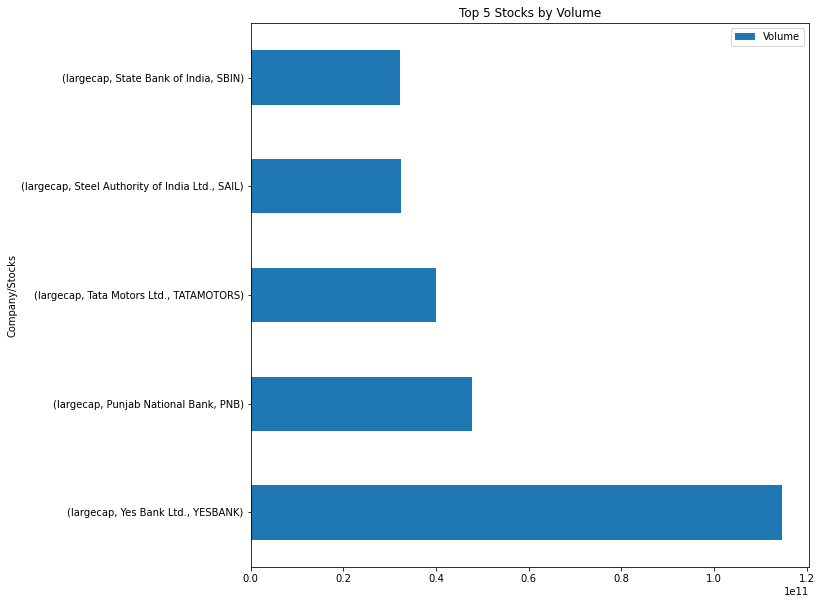

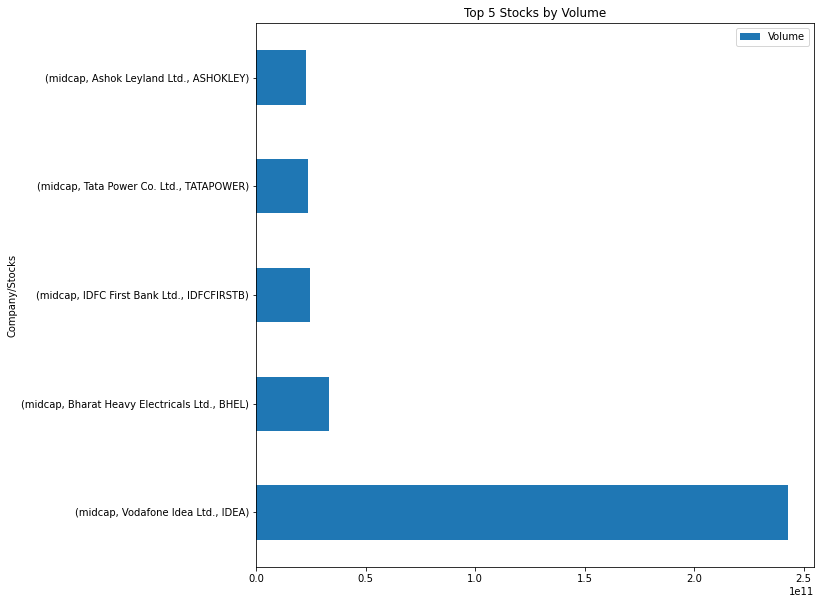

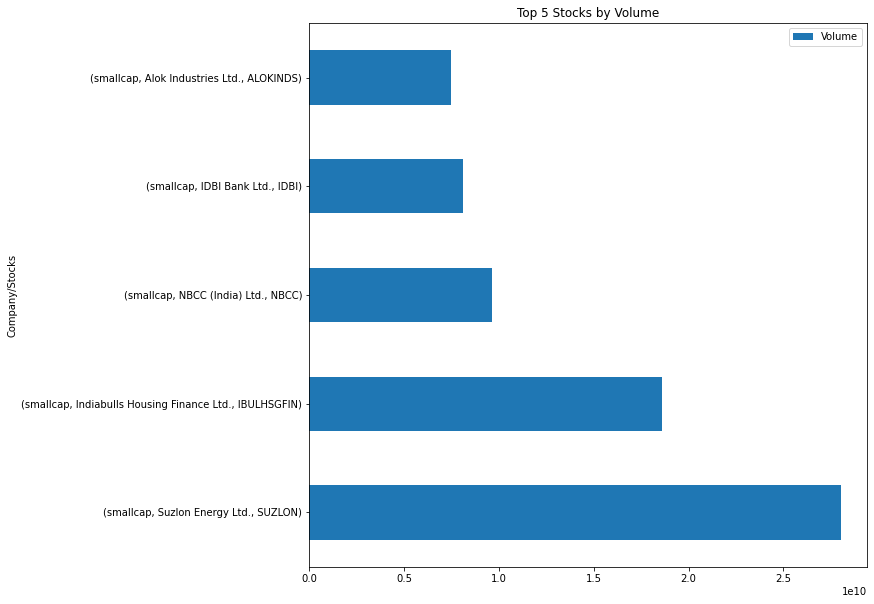

In [10]:
#Top highest volume traded stock/companies in each cap
data_combined.groupby(['cap','Company Name','Symbol']).agg({'Volume':'sum'}).groupby(['cap']).apply(lambda x: x.sort_values(by='Volume', ascending=False).head(5).plot(kind='barh',stacked=True,xlabel='Company/Stocks',ylabel='Volume',title='Top 5 Stocks by Volume',figsize=(10,10)))

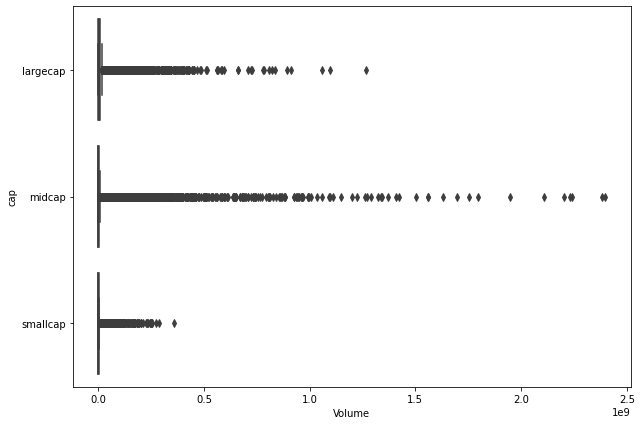

In [11]:
#volumne distribution 
def horizontal_boxplot(data_combined, column, cap):
    plt.figure(figsize=(10,7))
    sns.boxplot(x=column, y=cap, data=data_combined)
    plt.show()
horizontal_boxplot(data_combined, 'Volume', 'cap')

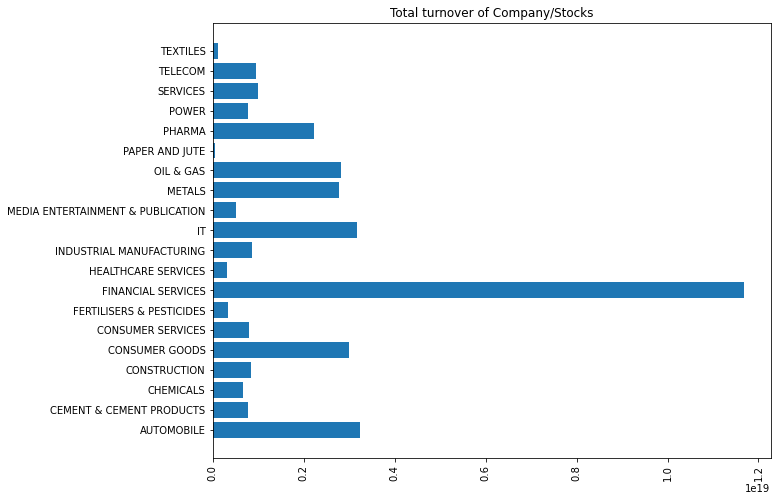

In [12]:
#Stocks/Companies turnover analysis
def grouped_bar_chart(data_combined, x, y):
    data_combined = data_combined.groupby(x).agg({y: 'sum'}).reset_index()
    plt.figure(figsize=(10,8))
    plt.barh(data_combined[x], data_combined[y])
    plt.title('Total turnover of Company/Stocks')
    plt.xticks(rotation=90)
    plt.show()
grouped_bar_chart(data_combined, 'Industry', 'Turnover')

(array([0.e+00, 1.e+14, 2.e+14, 3.e+14, 4.e+14, 5.e+14, 6.e+14, 7.e+14]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

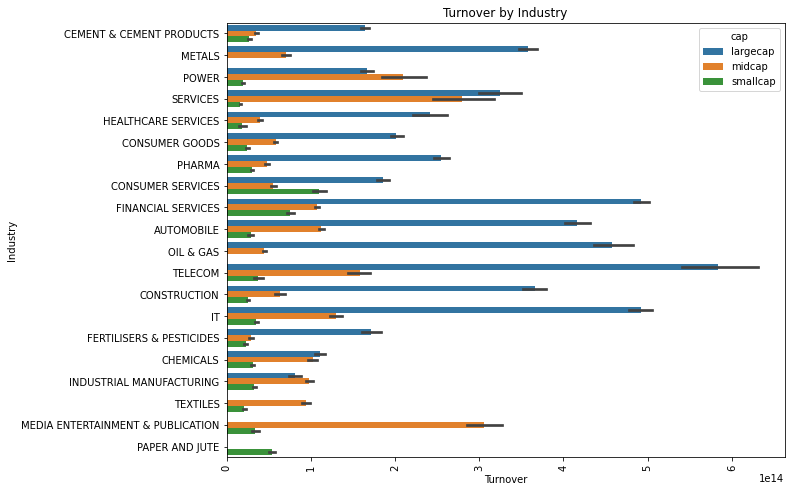

In [13]:
#Turnover analysis by industry
plt.figure(figsize=(10,8))
sns.barplot(data=data_combined, y='Industry', x='Turnover', hue='cap')
plt.title('Turnover by Industry')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Correlation Heatmap')

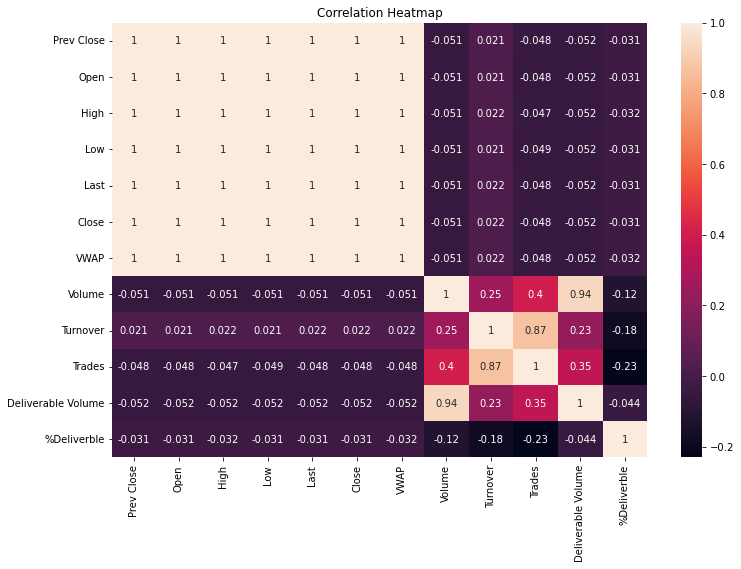

In [14]:
#correlation plots
plt.figure(figsize=(12,8))
sns.heatmap(data_combined.corr(), annot=True)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Average price change percentage per day')

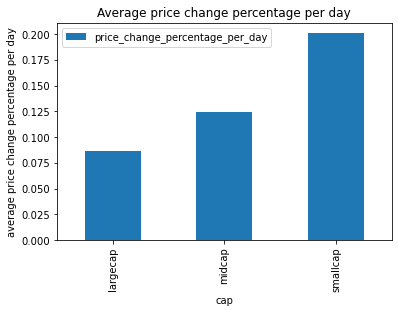

In [15]:
#Price analysis | pct change
data_combined['price_change_percentage_per_day'] = (data_combined['Open']-data_combined['Close'])*100/data_combined['Open']

data_combined.groupby('cap').agg({'price_change_percentage_per_day':'mean'}).plot(kind='bar')
plt.ylabel('average price change percentage per day')
plt.title('Average price change percentage per day')

Text(0.5, 1.0, 'Percentage of positive price change per day')

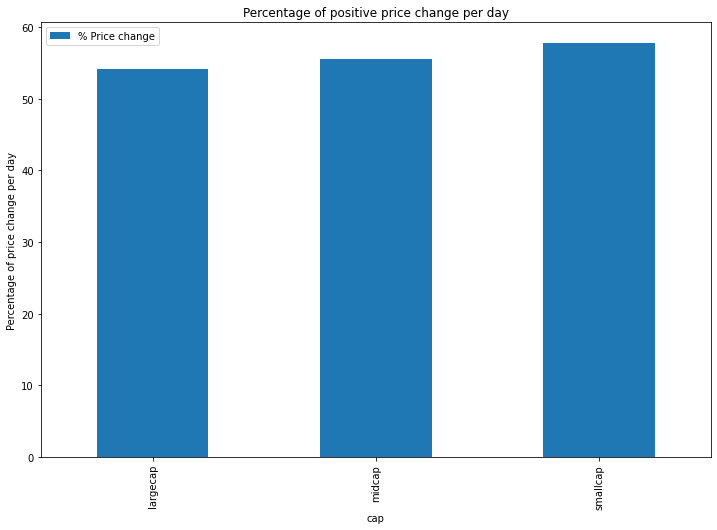

In [16]:
#Postive or negative total changes per day
data_agg = data_combined.groupby('cap').apply(lambda x: (x['price_change_percentage_per_day']>0).sum()*100/len(x)).reset_index()
data_agg.columns = ['cap','% Price change']
data_agg.set_index('cap', inplace=True)
data_agg.plot(kind='bar',figsize=(12,8))
plt.xlabel('cap')
plt.ylabel('Percentage of price change per day')
plt.title('Percentage of positive price change per day')

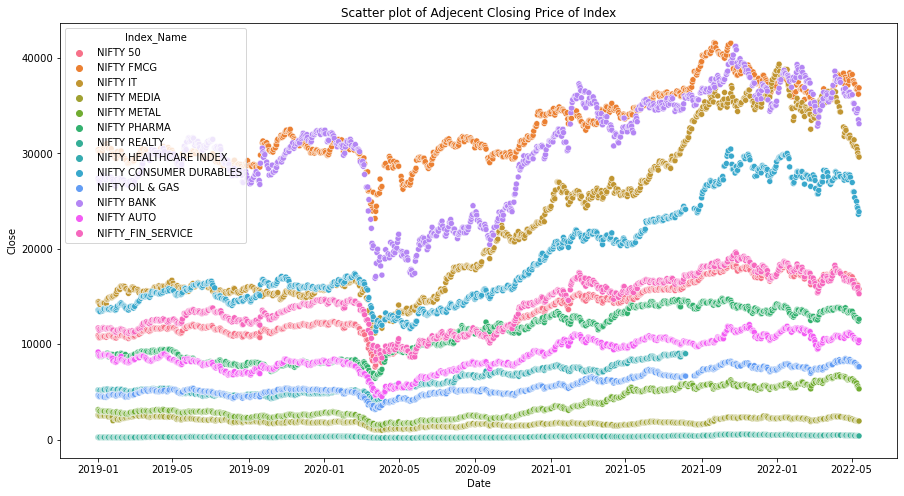

In [17]:
#Index plotting that the comnapy/stock belong to
def groupby_scatter(data_combined, x, y, cap):
    plt.figure(figsize=(15,8))
    sns.scatterplot(x=x, y=y, data=data_combined, hue=cap)
    plt.title('Scatter plot of Adjecent Closing Price of Index')
    plt.show()
groupby_scatter(data_index, 'Date', 'Close', 'Index_Name')

# Stock Filteration on Sharpe Ratio

In [18]:
#Stock filtration based upon Shape ratio

def sharpe_ratio(data_combined):
    data_combined = data_combined.dropna(subset=['Symbol','Date']).sort_values(by=['Symbol','Date']).reset_index(drop=True)
    data_combined['pct_change'] = data_combined.groupby('Symbol').apply(lambda x: x.Close.pct_change()).values
    sharpe_ratio = data_combined.groupby('Symbol').apply(lambda x: (x['pct_change'].mean()*252)/(x['pct_change'].std()*np.sqrt(252))).reset_index()
    sharpe_ratio.columns = ['Symbol','sharpe_ratio']
    sharpe_ratio = sharpe_ratio.set_index('Symbol').sort_values(by='sharpe_ratio', ascending=False)
    plt.figure()
    sharpe_ratio.head(10).plot(kind='bar',figsize=(20,8),title='Company-Symbol with highest Sharpe Ratio')
    plt.xlabel('Symbol')
    plt.ylabel('Sharpe Ratio')
    plt.show()
    display(sharpe_ratio.head(10))
    return sharpe_ratio


<Figure size 432x288 with 0 Axes>

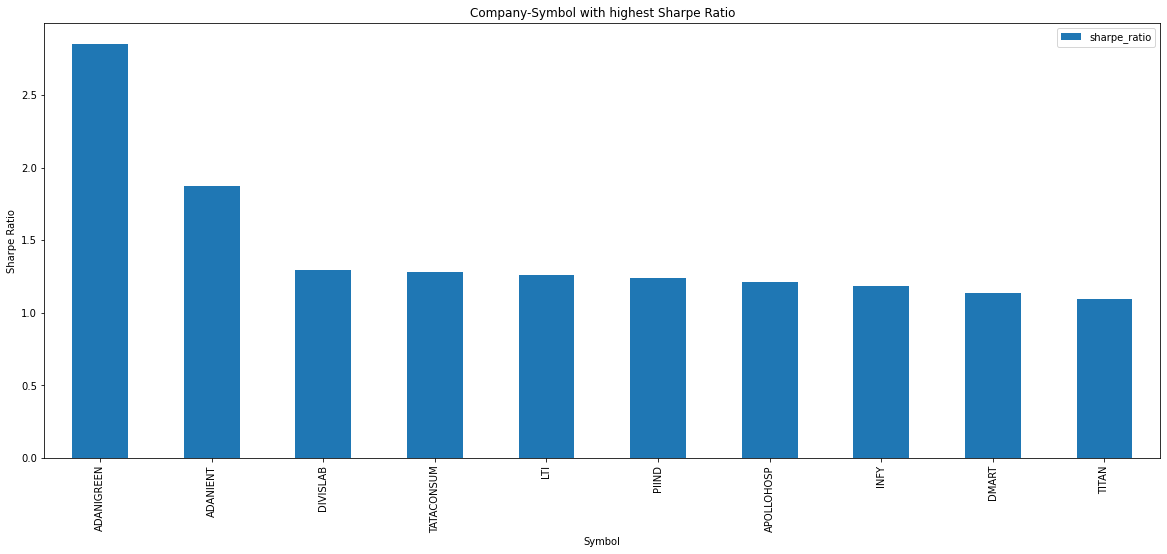

,sharpe_ratio
Symbol,
ADANIGREEN,2.853960
ADANIENT,1.871728
DIVISLAB,1.299190
TATACONSUM,1.279753
LTI,1.260461
PIIND,1.243871
APOLLOHOSP,1.212628
INFY,1.182992
DMART,1.135660


In [19]:
#10 filtered Large cap stocks/companies with best sharpe ratio
sharpe_ratio_large = sharpe_ratio(data_largecap)

<Figure size 432x288 with 0 Axes>

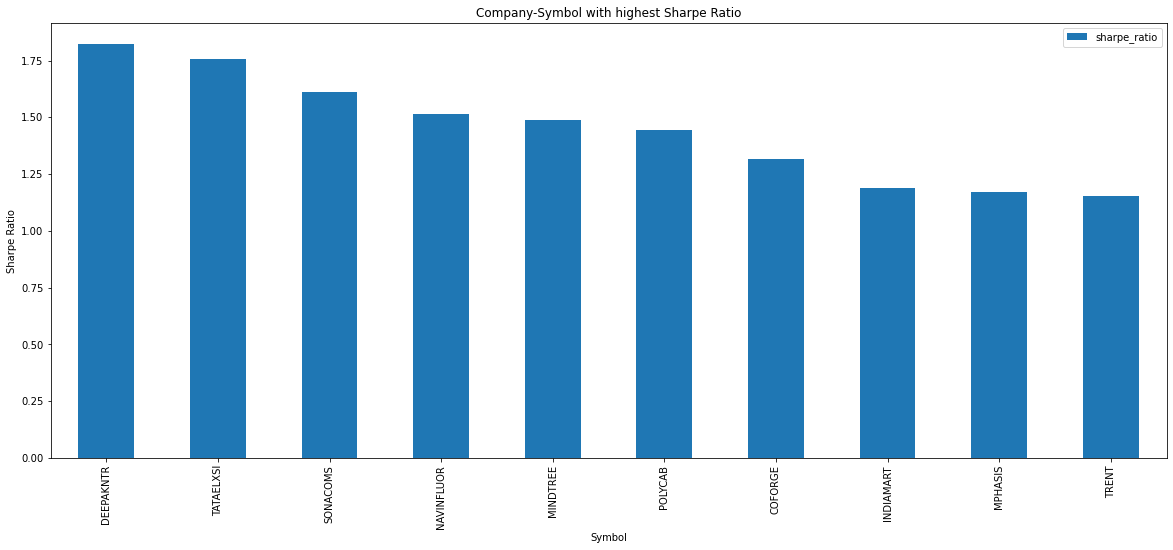

,sharpe_ratio
Symbol,
DEEPAKNTR,1.823712
TATAELXSI,1.757001
SONACOMS,1.613676
NAVINFLUOR,1.515980
MINDTREE,1.486939
POLYCAB,1.444235
COFORGE,1.316493
INDIAMART,1.189019
MPHASIS,1.172176


In [20]:
#10 filtered Mid cap stocks/companies with best sharpe ratio
sharpe_ratio_mid = sharpe_ratio(data_midcap)

<Figure size 432x288 with 0 Axes>

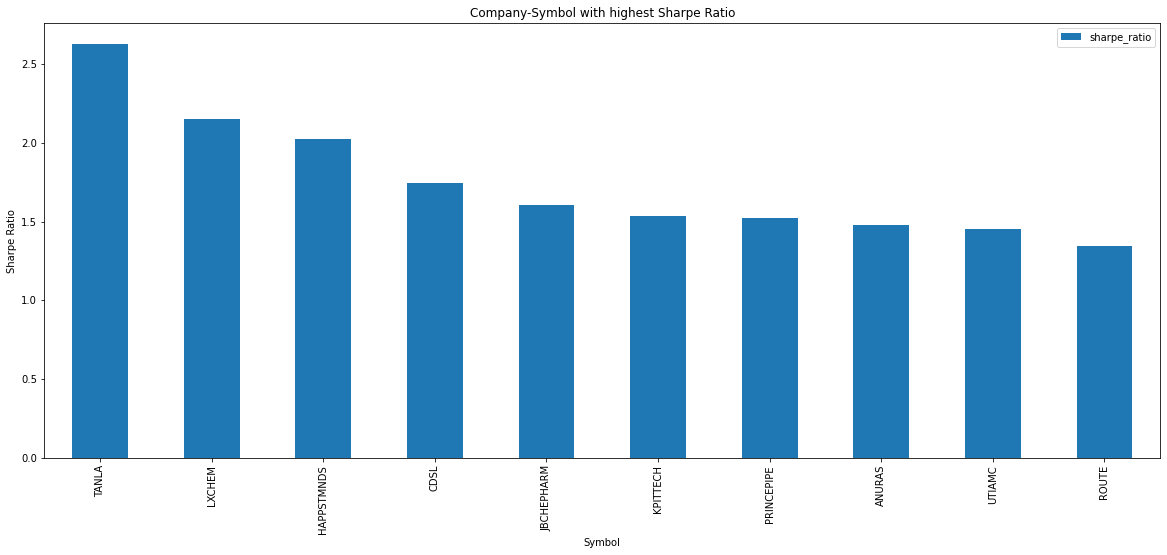

,sharpe_ratio
Symbol,
TANLA,2.628254
LXCHEM,2.153448
HAPPSTMNDS,2.026366
CDSL,1.746900
JBCHEPHARM,1.606046
KPITTECH,1.537650
PRINCEPIPE,1.524683
ANURAS,1.479311
UTIAMC,1.450794


In [21]:
#10 filtered Small cap stocks/companies with best sharpe ratio 
sharpe_ratio_small = sharpe_ratio(data_smallcap)

# Stock Market Prediction

In [22]:
#Import all libraries necessary for modelling

!pip install yfinance
!pip install yahoofinancials
!pip install ipywidgets
!pip install pmdarima
!pip install pandas
!pip install xgboost
!pip install seaborn


In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import norm
import numpy as np
from xgboost import XGBRegressor
import warnings
import statsmodels.api as sm
import ipywidgets as widgets
import seaborn as sns

warnings.filterwarnings("ignore")


In [24]:
#Fetching data from yahoo
def get_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date)


In [25]:
#Stocks selected based on high sharpe ratio for modelling and prediction
# stock = 'ADANIGREEN.NS'
# stock = 'TANLA.NS'
# stock = 'LXCHEM.NS'
stock = 'HAPPSTMNDS.NS'
# stock = 'ADANIENT.NS'
# stock = 'DEEPAKNTR.NS'
# stock = 'TATAELXSI.NS'
# stock = 'CDSL.NS'
# stock = 'SONACOMS.NS'
#stock = 'JBCHEPHARM.NS'

In [26]:
#Fetching data
start_date = pd.to_datetime('2021-05-27')
end_date = pd.to_datetime('2022-05-27')
raw_data = get_data(stock, start_date, end_date)
raw_data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-27,809.099976,874.000000,805.950012,853.950012,848.119080,9396784
2021-05-28,883.000000,910.000000,860.000000,876.099976,870.117798,9845189
2021-05-31,872.000000,889.000000,846.049988,867.549988,861.626221,5025981
2021-06-01,874.000000,884.000000,840.200012,844.000000,838.237061,2976733
2021-06-02,848.400024,899.000000,846.000000,888.099976,882.035889,3877846
...,...,...,...,...,...,...
2022-05-20,929.799988,935.000000,899.000000,910.750000,908.597351,216997
2022-05-23,913.400024,930.000000,896.349976,925.849976,923.661621,241778
2022-05-24,929.400024,932.000000,902.299988,906.049988,903.908447,147055


In [27]:
#Preprocessing module
def preprocess_time_Series_data(data):
    lag_features = ['Close']
    # Creating rolling window of 7 days for open,close,high,low,volume
    df_r_7 = data[lag_features].rolling(window=7, min_periods=0)
    # Getting the mean of the rolling window
    df_m_7 = df_r_7.mean().shift(1).add_suffix('_mean_7d')  
    # Concatenating the mean of the rolling window with the close price
    data = pd.concat([df_m_7, data[['Close']]], axis=1)
    # Drop NaN values
    data.dropna(inplace=True)
    MM_X = MinMaxScaler()
    MM_Y = MinMaxScaler()
    X_cols = data.columns[:-1]
    Y_cols = [data.columns[-1]]
    # Scaling the data so that every feature is between 0 and 1 and have same scale
    scaled_data_X = pd.DataFrame(MM_X.fit_transform(
        data[X_cols]), columns=X_cols, index=data.index)  # scalling the data using MinMaxScaler
    scaled_data_Y = pd.DataFrame(MM_Y.fit_transform(
        data[Y_cols]), columns=data[Y_cols].columns, index=data.index)  # scalling the data using MinMaxScaler
    scaled_data = pd.concat([scaled_data_X, scaled_data_Y], axis=1)
    return scaled_data, MM_X, MM_Y, X_cols, Y_cols


scaled_data, MM_X, MM_Y, X_cols, Y_cols = preprocess_time_Series_data(raw_data)


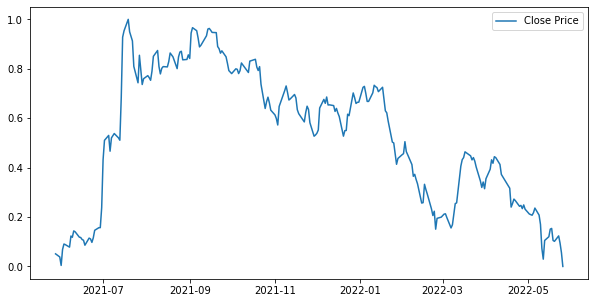

In [28]:
#Plotting Closing price of the stock
plt.figure(figsize=(10, 5))
plt.plot(scaled_data['Close'], label='Close Price')
plt.legend(loc='best')


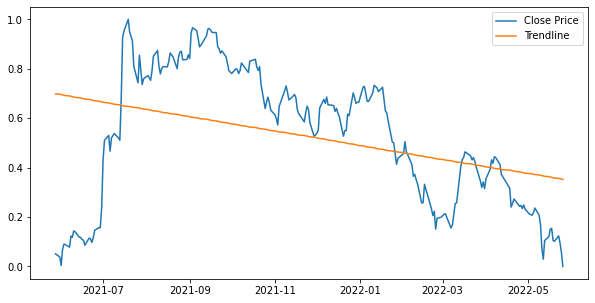

In [29]:
#Trend analysis of the stock
def polyfit_for_rendline(data, degree):
    trendline = np.polyfit(data.reset_index().index, data['Close'], degree)
    trendline_fn = np.poly1d(trendline)
    return trendline_fn(data.reset_index().index)


plt.figure(figsize=(10, 5))
plt.plot(scaled_data['Close'], label='Close Price')
plt.plot(scaled_data.index, polyfit_for_rendline(
    scaled_data, 1), label='Trendline')
plt.legend(loc='best')


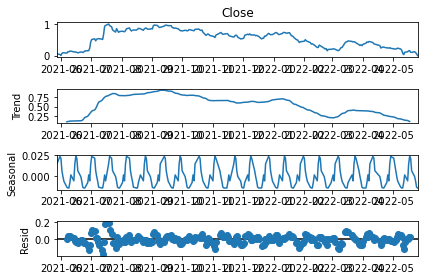

In [30]:
#Decomposition of the stock

def decomposition_plot_for_timeseries(data, title):

    decomposition = sm.tsa.seasonal_decompose(
        data, model='additive', period=12)
    plt.figsize = (10, 5)
    fig = decomposition.plot()
    plt.show()

decomposition_plot_for_timeseries(
    scaled_data['Close'], 'Decomposition Plot for Close Price')

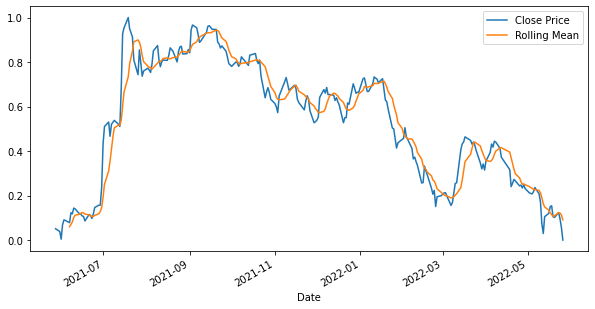

In [31]:
# 7 days rolling average of closing price of the stock
plt.figure(figsize=(10, 5))
plt.plot(scaled_data['Close'], label='Close Price')
scaled_data.rolling(window=7).mean()['Close'].plot(label='Rolling Mean')
plt.legend(loc='best')


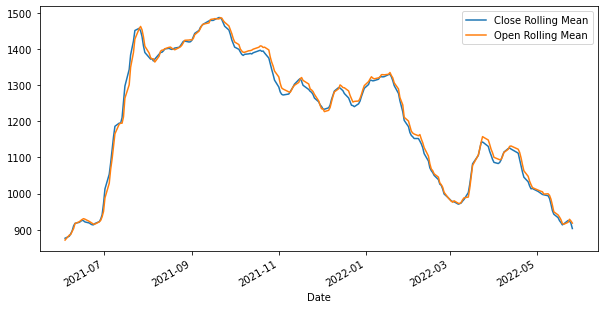

In [32]:
#Open vs Closing price
plt.figure(figsize=(10, 5))
raw_data.rolling(window=7).mean()['Close'].plot(label='Close Rolling Mean')
raw_data.rolling(window=7).mean()['Open'].plot(label='Open Rolling Mean')
plt.legend(loc='best')

<AxesSubplot:xlabel='Date'>

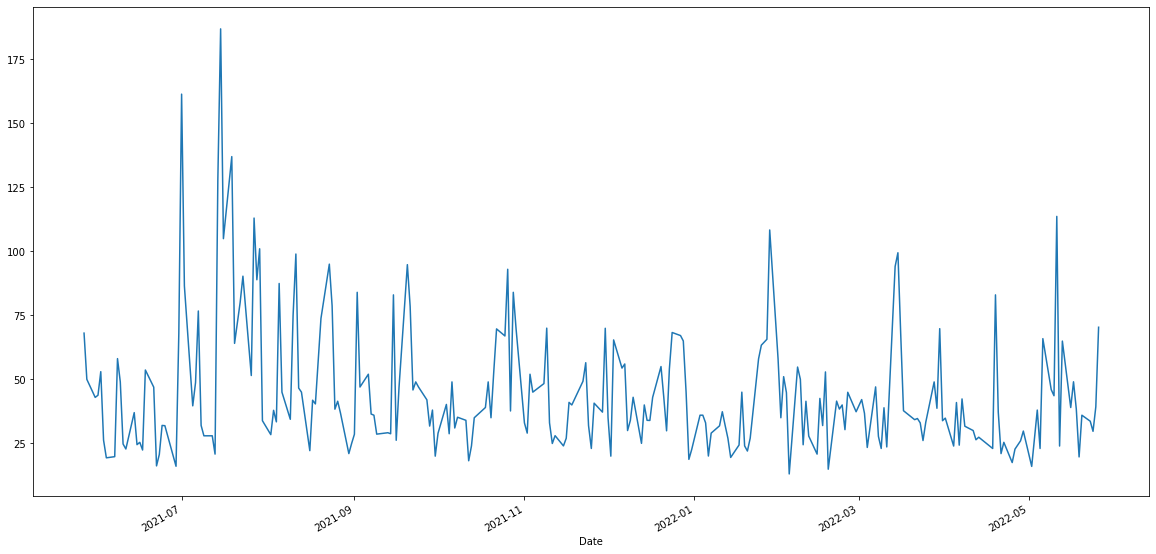

In [33]:
#Stocks graph on volitility
(raw_data['High']-raw_data['Low']).plot(figsize=(20, 10))

In [34]:
#Evaluation to ick best model: Showing values of errors and accuracy of 4 ML models
def evaluate_and_visualize_with_metrics_mape_rmse_mae(train, test, predictions, visualize=False):
    if visualize:
        plt.figure(figsize=(25, 8))
        plt.plot(train['Close'], label='Train')
        plt.plot(test, label='actual test')
        plt.plot(test.index, predictions, label='predicted test')
        plt.legend()
        plt.show()
        print('MAPE: ', mean_absolute_percentage_error(test, predictions).round(2))
        print('RMSE: ', sqrt(mean_squared_error(test, predictions)))
        print('MAE: ', mean_absolute_error(test, predictions))
        print('Accuracy', 1-mean_absolute_percentage_error(test, predictions))
    return{'MAPE': mean_absolute_percentage_error(test, predictions), 'RMSE': sqrt(mean_squared_error(test, predictions)), 'MAE': mean_absolute_error(test, predictions), 'Accuracy': 1-mean_absolute_percentage_error(test, predictions)}


In [35]:
#Test Train split according to time series | Cross validation.
from sklearn.model_selection import TimeSeriesSplit

def time_series_train_test_split(scaled_data, test_size):
    ts = TimeSeriesSplit(n_splits=3, test_size=int(test_size*len(scaled_data)))
    train = {}
    test = {}
    for fold, (train_index, test_index) in enumerate(ts.split(scaled_data)):
        train[f'fold_{fold}'] = scaled_data.iloc[train_index]
        print((train_index.min(), train_index.max()), 'for train')
        test[f'fold_{fold}'] = scaled_data.iloc[test_index]
        print((test_index.min(), test_index.max()), 'for test')
    return train, test
train, test = time_series_train_test_split(scaled_data, 0.3)

(0, 25) for train
(26, 99) for test
(0, 99) for train
(100, 173) for test
(0, 173) for train
(174, 247) for test


In [36]:
#Result function
results = {}

fold_0
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-78.511, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-81.923, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-80.054, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-78.163, Time=0.13 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-77.643, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-81.459, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-80.005, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-77.980, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-77.857, Time=0.14 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=-80.041, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=-78.152, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=-79.049, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[1] interc

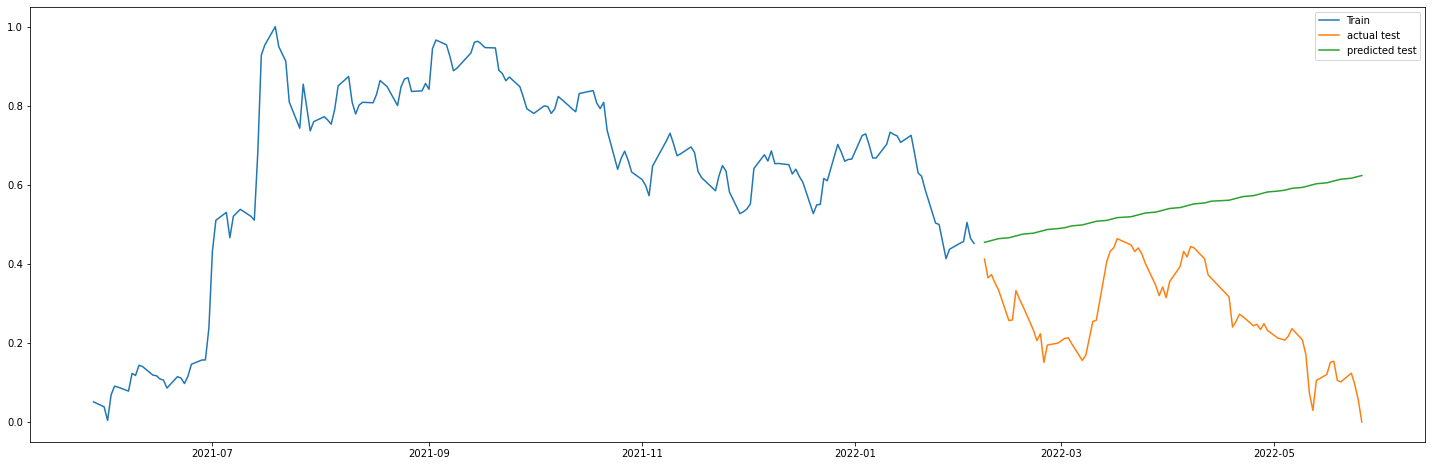

MAPE:  37950667255332.38
RMSE:  0.30645379187188176
MAE:  0.26972645270779355
Accuracy -37950667255331.375


In [37]:
#ML MODEL 1  = Auto Arima Model
fold_results_arima = {}
for fold in train.keys():
    print(fold)
    train_data_Y = train[fold][Y_cols]
    test_data_Y = test[fold][Y_cols]
    model = auto_arima(train_data_Y, trace=True, supress_warnings=True, stepwise=False, random_state=20, n_fits=50)
    predictions = model.predict(n_periods=len(test_data_Y))
    fold_results_arima[fold] = evaluate_and_visualize_with_metrics_mape_rmse_mae(
        train_data_Y, test_data_Y, predictions.reshape(-1, 1))
results['AUTO_ARIMA'] = fold_results_arima['fold_2']
r = evaluate_and_visualize_with_metrics_mape_rmse_mae(
    train_data_Y, test[fold][Y_cols], predictions.reshape(-1, 1), visualize=True)


(0, 25) for train
(26, 99) for test
(0, 99) for train
(100, 173) for test
(0, 173) for train
(174, 247) for test


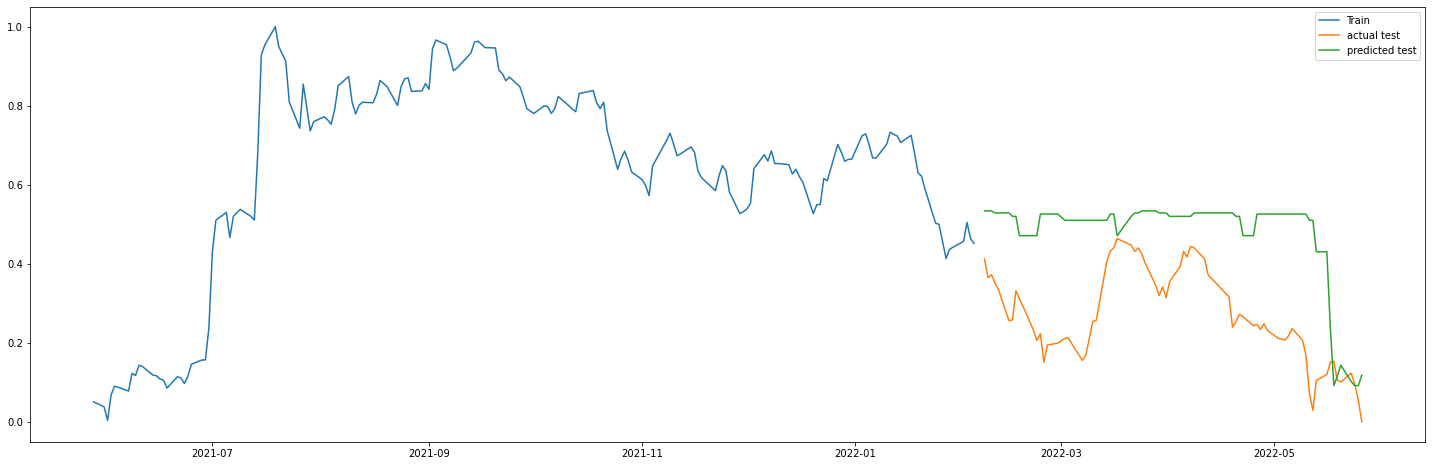

MAPE:  7211363449552.71
RMSE:  0.23270640963152375
MAE:  0.20593250839997285
Accuracy -7211363449551.71


In [38]:
#ML MODEL 2  = XG Boost Model

from sklearn.model_selection import GridSearchCV

def xgb_regressor(train, test):

    regressor = XGBRegressor(random_state=0)
    regressor.fit(train[X_cols], train[Y_cols])
    y_pred = regressor.predict(test[X_cols])
    return regressor, y_pred

#TS
train, test = time_series_train_test_split(scaled_data, 0.3)
fold_results_xgb = {}
for fold in train.keys():
    model, y_pred = xgb_regressor(train[fold], test[fold])
    fold_results_xgb[fold] = evaluate_and_visualize_with_metrics_mape_rmse_mae(
        train[fold][Y_cols], test[fold][Y_cols], y_pred.reshape(-1, 1))
results['XGBoost'] = fold_results_xgb['fold_2']
r = evaluate_and_visualize_with_metrics_mape_rmse_mae(
    train[fold][Y_cols], test[fold][Y_cols], y_pred.reshape(-1, 1), visualize=True)

(0, 25) for train
(26, 99) for test
(0, 99) for train
(100, 173) for test
(0, 173) for train
(174, 247) for test


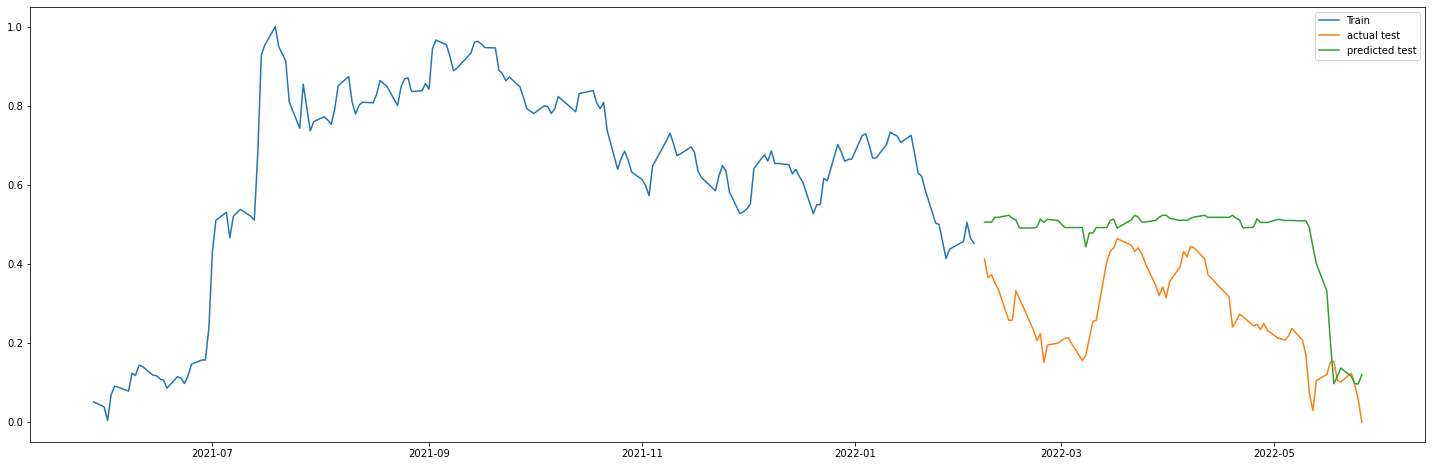

MAPE:  7311977032311.36
RMSE:  0.21816263739227962
MAE:  0.19241049002126728
Accuracy -7311977032310.365


In [39]:
#ML MODEL 3  = Random Forest Model

def random_forest_regressor(train, test):

    from sklearn.ensemble import RandomForestRegressor
    rfmodel = RandomForestRegressor(random_state=0)
    rfmodel.fit(train[X_cols], train[Y_cols])
    y_pred = rfmodel.predict(test[X_cols])
    return rfmodel, y_pred

#TS
train, test = time_series_train_test_split(scaled_data, 0.3)
fold_results_rf = {}
for fold in train.keys():
    model, y_pred = random_forest_regressor(train[fold], test[fold])
    fold_results_rf[fold] = evaluate_and_visualize_with_metrics_mape_rmse_mae(
        train[fold][Y_cols], test[fold][Y_cols], y_pred.reshape(-1, 1))
results['random_forest'] = fold_results_rf['fold_2']
r = evaluate_and_visualize_with_metrics_mape_rmse_mae(
    train[fold][Y_cols], test[fold][Y_cols], y_pred.reshape(-1, 1), visualize=True)

(0, 25) for train
(26, 99) for test
(0, 99) for train
(100, 173) for test
(0, 173) for train
(174, 247) for test


2022-09-07 23:35:39.675497: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


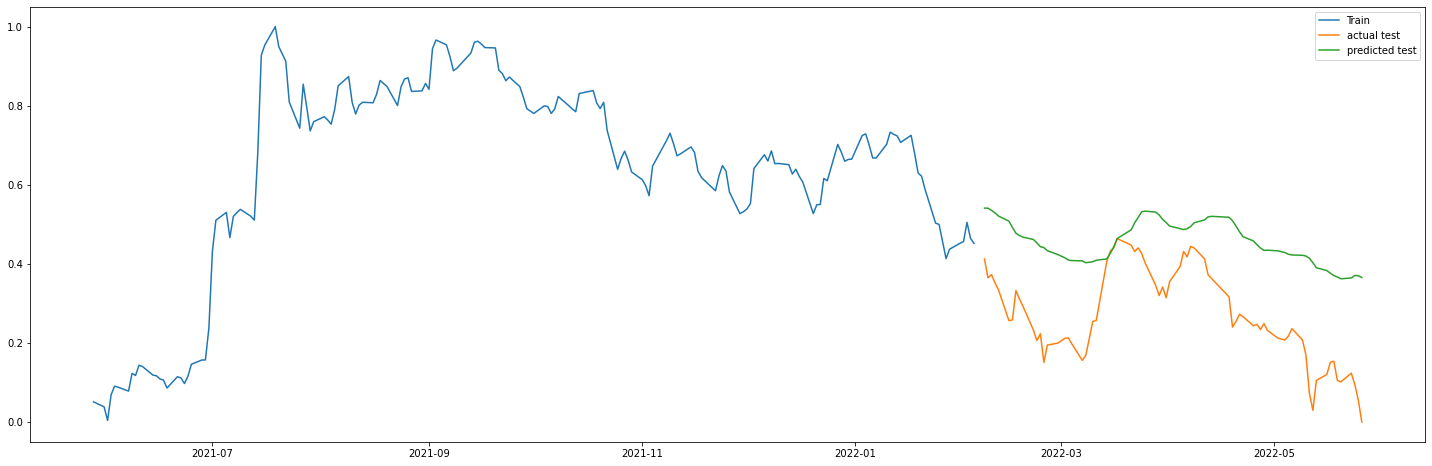

MAPE:  22253725534375.16
RMSE:  0.2029285544027335
MAE:  0.18600385059200208
Accuracy -22253725534374.164


In [40]:
#ML MODEL 4  = LSTM Model

# LSTM for time series data
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


def lstm_for_time_series_data(train, test):

    # reshape into X=t and Y=t+1
    training_df_X, training_df_Y = train[X_cols], train[Y_cols]
    testing_df_X, testing_df_Y = test[X_cols], test[Y_cols]
    training_df_X = training_df_X.values.reshape(-1, 1, len(X_cols))
    testing_df_X = testing_df_X.values.reshape(-1, 1, len(X_cols))
    # design network
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(
        training_df_X.shape[1], training_df_X.shape[2])))
    # Added dropout layer to reducer overfitting
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    model.fit(training_df_X, training_df_Y, epochs=100, batch_size=72, validation_data=(
        testing_df_X, testing_df_Y), verbose=0, shuffle=False)
    # make a prediction
    yhat = model.predict(testing_df_X)
    return model, yhat

#TS
train, test = time_series_train_test_split(scaled_data, 0.3)
fold_results_lstm = {}
for fold in train.keys():
    model, y_pred = lstm_for_time_series_data(train[fold], test[fold])
    fold_results_lstm[fold] = evaluate_and_visualize_with_metrics_mape_rmse_mae(
        train[fold][Y_cols], test[fold][Y_cols], y_pred.reshape(-1, 1))
results['LSTM'] = fold_results_lstm['fold_2']
r = evaluate_and_visualize_with_metrics_mape_rmse_mae(
    train[fold][Y_cols], test[fold][Y_cols], y_pred.reshape(-1, 1), visualize=True)


In [41]:
#printing results of all 4 models
print(f'              model results for {stock}')
pd.DataFrame(results).T


              model results for HAPPSTMNDS.NS


,MAPE,RMSE,MAE,Accuracy
AUTO_ARIMA,3.795067e+13,0.306454,0.269726,-3.795067e+13
XGBoost,7.211363e+12,0.232706,0.205933,-7.211363e+12
random_forest,7.311977e+12,0.218163,0.192410,-7.311977e+12
LSTM,2.225373e+13,0.202929,0.186004,-2.225373e+13


In [42]:
# doing forecasting for n days for future where we dont have true data
def forecasting_for_n_days(n, model, prev_n_days, MM_Y):
    
    prev_n_days = prev_n_days[-7:]
    for i in range(n):
        next_day_prediction = model.predict(
            prev_n_days[-7:].mean().reshape(-1, 1))
        prev_n_days = np.append(
            prev_n_days, next_day_prediction)
    results = pd.DataFrame(prev_n_days[7:], columns=['Close'], index=pd.bdate_range(
        pd.to_datetime(end_date)+timedelta(days=1), periods=n, freq='B'))
    results['Close'] = MM_Y.inverse_transform(results[['Close']])
    return results

#plotting 4 different charts forecasted using our model
#plot 1 day,1 week,2 week,1 month results in subplot
def plot_forecasting(df, title, subplot_number, MM_Y, stock, train, test):

    ax = plt.subplot(subplot_number)
    test_temp = pd.DataFrame(MM_Y.inverse_transform(
        test[['Close']]), columns=['Close'], index=test.index)
    test_temp['color'] = 'test'
    df['color'] = 'forecast'
    df = pd.concat([test_temp, df], axis=0)
    sns.lineplot(x=df.index, y=df.Close, hue=df.color, data=df)
    ax.set_title(stock+' '+title + ' Forecast')
    ax.legend()


In [43]:
#Pipeline for forecasting

def pipeline(stock):
    start_date = pd.to_datetime('2021-05-27')
    end_date = pd.to_datetime('2022-05-27')

    # getting data for selected stock
    fetched_data = get_data(stock, start_date, end_date)
    # preprocessing data for selected stock
    preprocessed_data, MM_X, MM_Y, X_cols, Y_cols = preprocess_time_Series_data(
        fetched_data)
    # splitting data into train and test
    train_data_dict, test_data_dict = time_series_train_test_split(preprocessed_data, 0.3)
    train = train_data_dict[list(train_data_dict.keys())[-1]]
    test = test_data_dict[list(test_data_dict.keys())[-1]]
    # training and testing LSTM model
    model, ypred = lstm_for_time_series_data(train, test)
    # forecasting for n days
    n = 31
    # plt.plot(pd.DataFrame(MM_Y.inverse_transform(train[['Close']]),index=train.index),label='Train')
    results = forecasting_for_n_days(n, model, ypred, MM_Y)
    # plot results
    plt.figure(figsize=(25, 10))
    plot_forecasting(results.iloc[:2], '2 Day', 221, MM_Y, stock, train, test)
    plot_forecasting(results.iloc[:7], '1 Week', 222, MM_Y, stock, train, test)
    plot_forecasting(results.iloc[:14], '2 Week',223, MM_Y, stock, train, test)
    plot_forecasting(results.iloc[:31], '1 Month',224, MM_Y, stock, train, test)


In [44]:
#Stocks to be be forecated for 2 day,1 week,2 week,1 month results
stocks = ['None', 'ADANIGREEN.NS', 'TANLA.NS', 'LXCHEM.NS', 'HAPPSTMNDS.NS', 'ADANIENT.NS', 'DEEPAKNTR.NS', 'TATAELXSI.NS', 'CDSL.NS', 'SONACOMS.NS', 'JBCHEPHARM.NS']

dropdown = widgets.Dropdown(
    options=stocks,
    value='None',
    description='Choose a stock:',
    disabled=False,
    style={'description_width': 'initial', 'width': 'initial',
           'font-size': '20px', 'font-family': 'Arial'}
)
display(dropdown)

Dropdown(description='Choose a stock:', options=('None', 'ADANIGREEN.NS', 'TANLA.NS', 'LXCHEM.NS', 'HAPPSTMNDS…

# Select stock from the above dropdown button before you run the pipeline below.

[*********************100%***********************]  1 of 1 completed
(0, 25) for train
(26, 99) for test
(0, 99) for train
(100, 173) for test
(0, 173) for train
(174, 247) for test


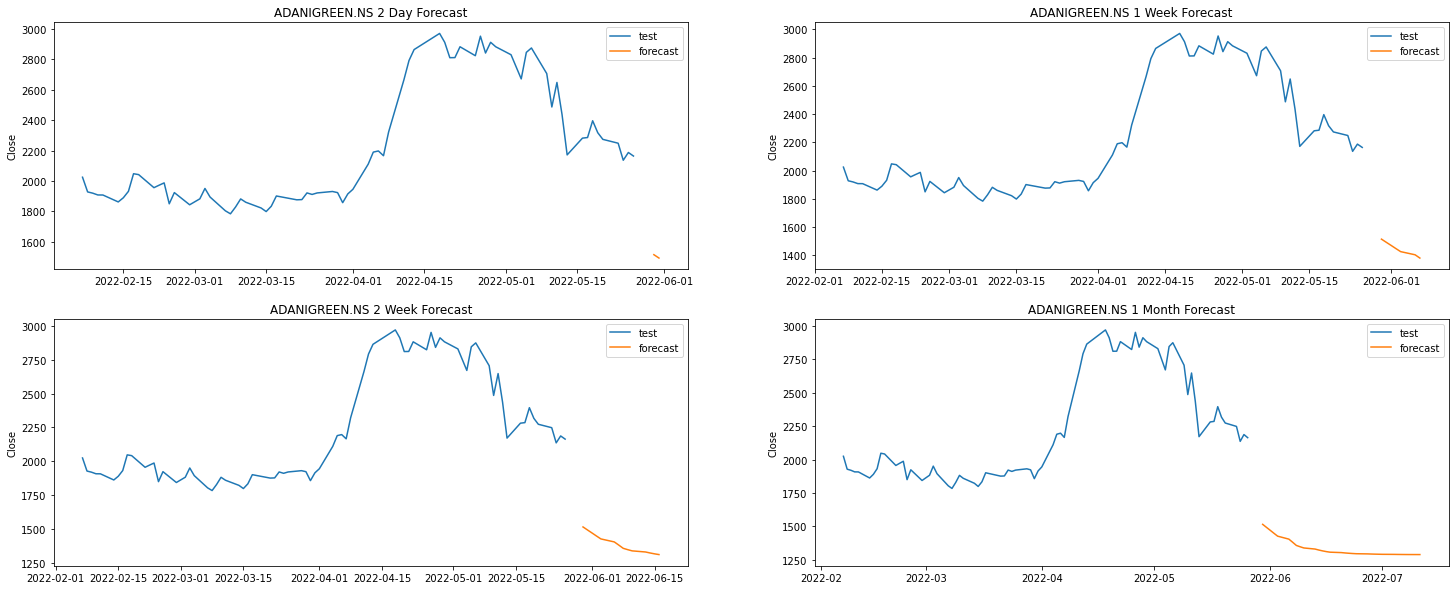

In [46]:
#click stocks from the drop down button before running next command.
#Calling pipeline function to display the portfolio of stock
pipeline(stock=dropdown.value)

# Portfolio Optimization of Forecasted Stocks

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import datetime
import matplotlib.pyplot as plt

In [10]:
def get_ret_vol_sr(portfolio_wt):
    portfolio_wt = np.array(portfolio_wt)
    ret = np.sum(log_return_val.mean()*portfolio_wt) * 252
    vol = np.sqrt(np.dot(portfolio_wt.T, np.dot(log_return_val.cov()*252, portfolio_wt)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(portfolio_wt):
    return get_ret_vol_sr(portfolio_wt)[2] * -1

def check_sum(portfolio_wt):
    return np.sum(portfolio_wt)-1

In [11]:
# List of tickers
stocklist = ['ADANIGREEN.NS', 'TANLA.NS', 'LXCHEM.NS', 'HAPPSTMNDS.NS', 'ADANIENT.NS', 'DEEPAKNTR.NS']
names = ["Adani Greens", "Tanla Ltd.", "Laxmi Organic", "Happiest Tech Ltd.", "Adani Enterprises", "Deepak Nitrite"]


# Start and end date of the period under study
ending_date_ed = datetime.date.today()
starting_date_sd = ending_date_ed - datetime.timedelta(days=252*10)

# Number of portfolio Simulation
num_ports = 5000

stocks = pd.DataFrame()

for i in range(0, len(stocklist)):
    asset = yf.Ticker(stocklist[i])
    data = asset.history(start=starting_date_sd,end=ending_date_ed)[["Close"]]
    data = data.rename(columns = {'Close':stocklist[i]})
    stocks = pd.concat([stocks, data], axis=1)

stocks = stocks.dropna()
stocks.columns = names

stocks

,Adani Greens,Tanla Ltd.,Laxmi Organic,Happiest Tech Ltd.,Adani Enterprises,Deepak Nitrite
Date,,,,,,
2021-03-25,1226.800049,806.875854,163.725967,514.214722,980.482056,1527.455688
2021-03-26,1212.349976,817.280151,185.778458,519.031555,987.224731,1554.188477
2021-03-30,1157.650024,797.412964,174.279312,532.935974,1030.427734,1619.004395
2021-03-31,1104.849976,806.182312,173.731735,536.362488,1030.028198,1649.271851
2021-04-01,1160.050049,846.461670,180.053772,590.490295,1105.995239,1639.564331
...,...,...,...,...,...,...
2022-08-30,2436.199951,719.950012,332.149994,1031.900024,3194.350098,1979.050049
2022-09-01,2393.100098,721.200012,330.899994,1031.349976,3233.250000,2005.300049
2022-09-02,2383.100098,742.549988,326.899994,1020.750000,3355.800049,1982.800049


In [12]:
#Return calculation
log_return_val = np.log(stocks/stocks.shift(1))
log_return_val

,Adani Greens,Tanla Ltd.,Laxmi Organic,Happiest Tech Ltd.,Adani Enterprises,Deepak Nitrite
Date,,,,,,
2021-03-25,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-26,-0.011849,0.012812,0.126361,0.009324,0.006853,0.017350
2021-03-30,-0.046168,-0.024609,-0.063896,0.026437,0.042832,0.040858
2021-03-31,-0.046683,0.010937,-0.003147,0.006409,-0.000388,0.018522
2021-04-01,0.048754,0.048755,0.035743,0.096143,0.071159,-0.005903
...,...,...,...,...,...,...
2022-08-30,0.041208,0.003479,0.024072,0.026564,0.016333,0.018229
2022-09-01,-0.017850,0.001735,-0.003770,-0.000533,0.012104,0.013177
2022-09-02,-0.004187,0.029174,-0.012162,-0.010331,0.037202,-0.011284


In [13]:
# Simulation of portfolios
all_weights = np.zeros((num_ports, len(stocks.columns)))
return_array = np.zeros(num_ports)
volility_array = np.zeros(num_ports)
sharpe_ratio_array = np.zeros(num_ports)

# Calculate return, volatility & Sharp-ratio
for x in range(num_ports):
    portfolio_wt = np.array(np.random.random(len(stocklist)))
    portfolio_wt = portfolio_wt/np.sum(portfolio_wt)
    all_weights[x,:] = portfolio_wt
    return_array[x] = np.sum( (log_return_val.mean() * portfolio_wt * 252))
    volility_array[x] = np.sqrt(np.dot(portfolio_wt.T, np.dot(log_return_val.cov()*252, portfolio_wt)))
    sharpe_ratio_array[x] = return_array[x]/volility_array[x]

In [14]:
return_array


array([0.35311545, 0.40745399, 0.48728179, ..., 0.36482109, 0.53108336,
       0.36761796])

In [15]:
volility_array

array([0.29715922, 0.29791111, 0.29058043, ..., 0.29229514, 0.32542592,
       0.31672593])

In [16]:
#Capital Asset Pricing Model (CAPM)
#Optimization 
cons = ({'type':'eq', 'fun':check_sum})
init_guess = np.full((1,len(stocklist)),1/len(stocklist))
bounds = [[0,1]]*len(stocklist)

optimization_capm_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

ret_vol = get_ret_vol_sr(optimization_capm_results.x)

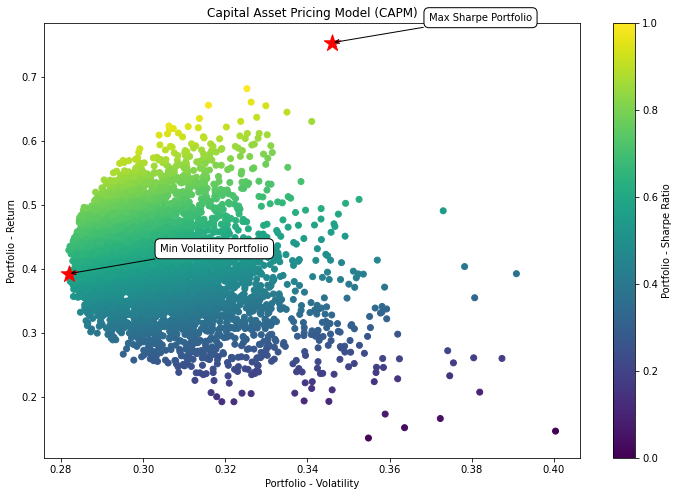

In [17]:
#Plot of Markovitz strategy
min_vol = volility_array.min()
ret_min_vol = return_array[volility_array == min_vol]
weight_min_vol = all_weights[volility_array == min_vol]


plt.figure(figsize=(12,8))
plt.scatter(volility_array, return_array, c=sharpe_ratio_array, cmap='viridis')
plt.scatter(ret_vol[1], ret_vol[0], c="red",marker='*',s=300)
plt.scatter(min_vol, ret_min_vol, c="red",marker='*',s=300)
plt.colorbar(label='Portfolio - Sharpe Ratio')
plt.xlabel('Portfolio - Volatility')
plt.ylabel('Portfolio - Return')

plt.annotate(
    "Max Sharpe Portfolio",
    xy=(ret_vol[1], ret_vol[0]), xytext=(200, 20),
    textcoords='offset points', ha='right', va='bottom',
    bbox=dict(boxstyle='round,pad=0.5', fc='white'),
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.annotate(
    "Min Volatility Portfolio",
    xy=(min_vol, ret_min_vol), xytext=(200, 20),
    textcoords='offset points', ha='right', va='bottom',
    bbox=dict(boxstyle='round,pad=0.5', fc='white'),
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.title("Capital Asset Pricing Model (CAPM)")

plt.show()

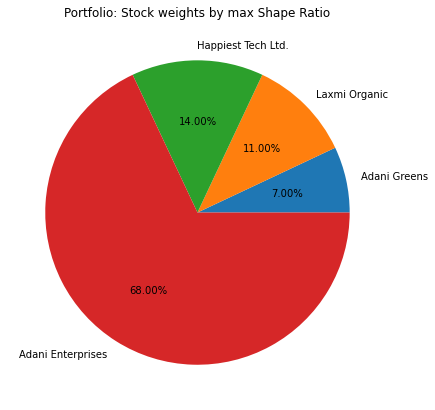

In [18]:

plt.figure(figsize=(15,7))

# delete stocks that have weight equal 0
weight_max_ratio_sharp = pd.DataFrame({"names" : names, "portfolio_wt" : np.round(optimization_capm_results.x*100)})
weight_max_ratio_sharp = weight_max_ratio_sharp[weight_max_ratio_sharp["portfolio_wt"] != 0]
weight_max_ratio_sharp.sort_values(by="portfolio_wt")

plt.pie(weight_max_ratio_sharp.portfolio_wt, labels=weight_max_ratio_sharp.names, autopct='%.2f%%')
plt.title("Portfolio: Stock weights by max Shape Ratio")
plt.show()

In [19]:
weight_max_ratio_sharp

,names,portfolio_wt
0,Adani Greens,7.0
2,Laxmi Organic,11.0
3,Happiest Tech Ltd.,14.0
4,Adani Enterprises,68.0


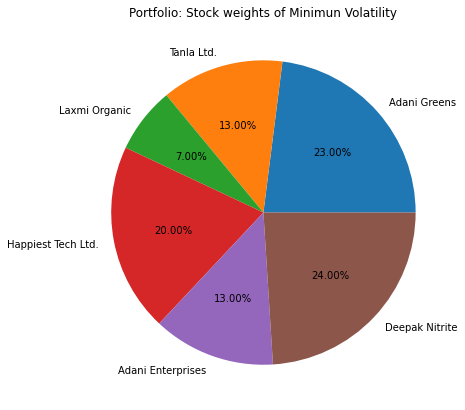

In [20]:
plt.figure(figsize=(15,7))

# Delete stocks that have weight equal 0
weight_min_vol_df = pd.DataFrame({"names" : names, "portfolio_wt" : np.round(weight_min_vol[0]*100)})
weight_min_vol_df = weight_min_vol_df[weight_min_vol_df["portfolio_wt"] != 0]
weight_min_vol_df.sort_values(by="portfolio_wt")

plt.pie(weight_min_vol_df.portfolio_wt, labels=weight_min_vol_df.names, autopct='%.2f%%')
plt.title("Portfolio: Stock weights of Minimun Volatility")
plt.show()

In [21]:
weight_min_vol_df

,names,portfolio_wt
0,Adani Greens,23.0
1,Tanla Ltd.,13.0
2,Laxmi Organic,7.0
3,Happiest Tech Ltd.,20.0
4,Adani Enterprises,13.0
5,Deepak Nitrite,24.0
